# Ajuste por mínimos cuadrados – Regresión lineal

Se aproxima el conjunto de datos dado utilizando el método de mínimos cuadrados,
empleando las funciones proporcionadas en el repositorio oficial del examen:

https://github.com/ztjona/MN-examen-02

Se determina:
- La función lineal de aproximación
- El error relativo para cada punto
- El error relativo mínimo, máximo y promedio
- La gráfica de los datos y de la función aproximante


In [16]:
import numpy as np
import matplotlib.pyplot as plt


In [17]:
# Derivadas parciales para regresión lineal
# ####################################################################
def der_parcial_1(xs: list, ys: list):
    c_ind = sum(ys)
    c_1 = sum(xs)
    c_0 = len(xs)
    return (c_1, c_0, c_ind)


def der_parcial_0(xs: list, ys: list):
    c_1 = 0
    c_0 = 0
    c_ind = 0
    for xi, yi in zip(xs, ys):
        c_ind += xi * yi
        c_1 += xi * xi
        c_0 += xi
    return (c_1, c_0, c_ind)


In [18]:
from src import ajustar_min_cuadrados


In [19]:
data = [
(-19.849, 300.682), (-29.698, 109.399), (-18.04, 309.383),
(-20.754, 287.79), (-13.216, 262.128), (-23.367, 261.066),
(-24.874, 241.597), (-18.844, 303.051), (-14.724, 285.93),
(-25.477, 228.369), (-25.075, 236.165), (-22.06, 284.392),
(-10.302, 205.234), (-20.854, 287.813), (-10.503, 214.57),
(-19.648, 298.733), (-12.312, 253.532), (-21.859, 287.969),
(-10.603, 214.864), (-14.925, 285.108), (-14.322, 282.151),
(-15.126, 291.951), (-22.462, 279.406), (-16.03, 296.948),
(-19.95, 299.401), (-16.131, 300.917), (-18.945, 301.778),
(-26.281, 211.784), (-18.442, 305.058), (-15.025, 288.366),
(-10.201, 207.134), (-25.176, 237.482), (-13.518, 271.179),
(-29.497, 118.383), (-27.286, 185.304)
]

xs = np.array([p[0] for p in data])
ys = np.array([p[1] for p in data])


In [20]:
coef = ajustar_min_cuadrados(
    xs.tolist(),
    ys.tolist(),
    gradiente=[der_parcial_1, der_parcial_0]
)

coef


[01-30 13:43:18][INFO][karin] Se ajustarán 2 parámetros.
[01-30 13:43:18][INFO][karin] 
[[-6.65376000e+02  3.50000000e+01  9.03501700e+03]
 [-1.81898940e-12  5.60142502e+01  1.78855277e+04]]


array([  3.21711935, 319.30317155])

La función de ajuste obtenida es:

\[
y = a_1 x + a_0
\]

donde los coeficientes se obtienen mediante el método de mínimos cuadrados.


In [21]:
def p(x):
    return coef[0]*x + coef[1]


In [22]:
y_aprox = p(xs)
errores_rel = np.abs(ys - y_aprox) / np.abs(ys)
errores_rel


array([0.15044276, 1.04536752, 0.15552458, 0.12250225, 0.05591819,
       0.0648773 , 0.0095881 , 0.14641504, 0.04894797, 0.03928564,
       0.01045415, 0.12679148, 0.39431287, 0.12369016, 0.33063227,
       0.14273545, 0.10319012, 0.13539249, 0.32731428, 0.04847403,
       0.03162637, 0.07299162, 0.11583775, 0.09838508, 0.14789316,
       0.11135689, 0.14389105, 0.10845984, 0.14779138, 0.06034015,
       0.3830918 , 0.00348226, 0.01709259, 0.89560834, 0.24941098])

In [23]:
erel_min = np.min(errores_rel)
erel_max = np.max(errores_rel)
erel_prom = np.mean(errores_rel)

erel_min, erel_max, erel_prom


(np.float64(0.0034822631136830575),
 np.float64(1.0453675180826865),
 np.float64(0.17626045463271245))

El error relativo promedio es:

\[
e_{rel,prom} =
\]

El error relativo máximo es:

\[
e_{rel,max} =
\]

El error relativo mínimo es:

\[
e_{rel,min} =
\]


In [24]:
idx_max = np.where(errores_rel == erel_max)
xs[idx_max], ys[idx_max]


(array([-29.698]), array([109.399]))

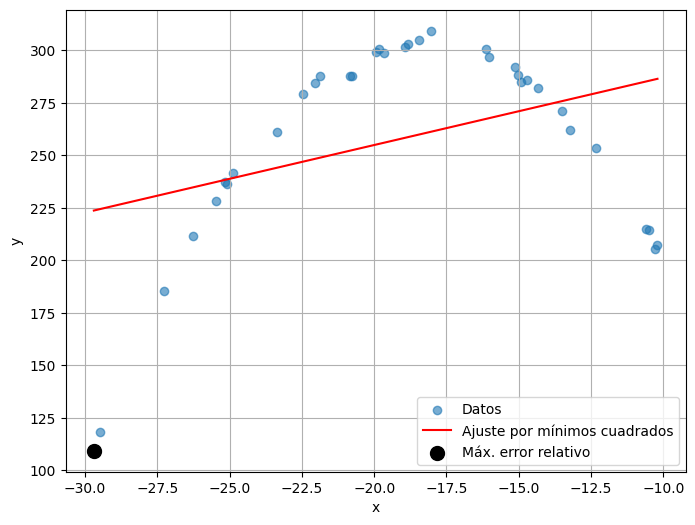

In [25]:
x_plot = np.linspace(min(xs), max(xs), 400)
y_plot = p(x_plot)

plt.figure(figsize=(8,6))
plt.scatter(xs, ys, label="Datos", alpha=0.6)
plt.plot(x_plot, y_plot, "r", label="Ajuste por mínimos cuadrados")

plt.scatter(xs[idx_max], ys[idx_max],
            color="black", s=100, label="Máx. error relativo")

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()
